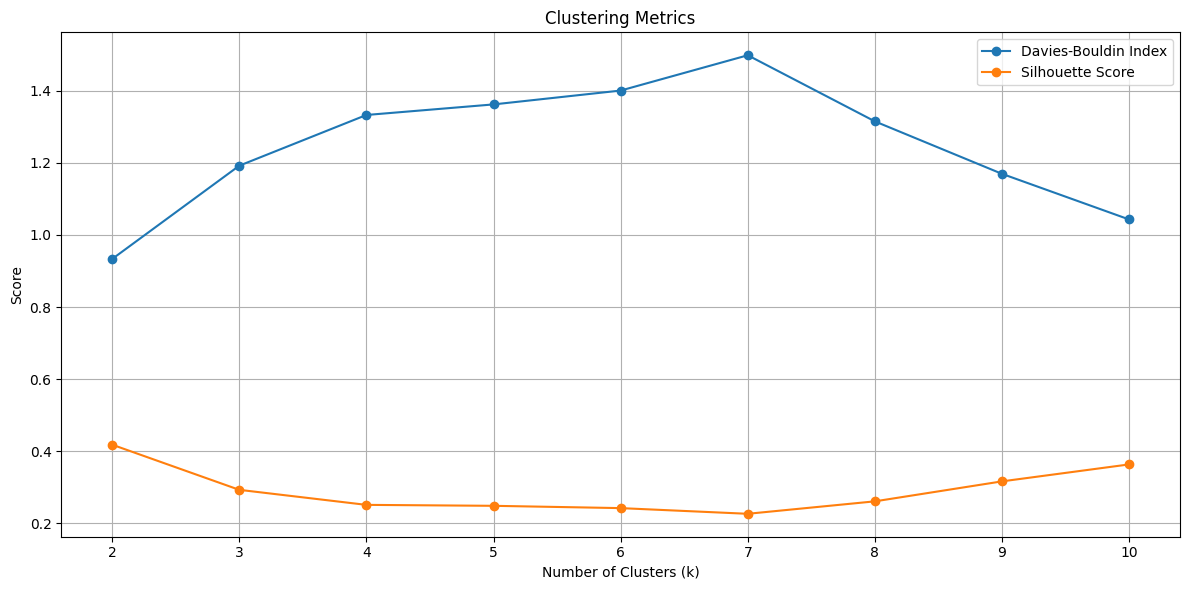

Optimal Number of Clusters: 2
Davies-Bouldin Index: 0.9333
Silhouette Score: 0.4180


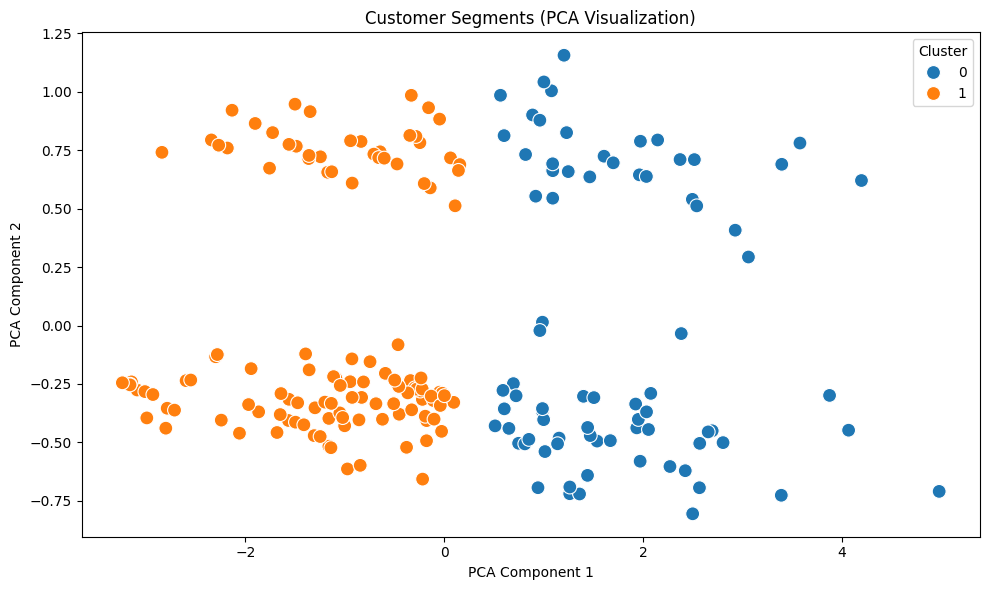

Dharmanshu_Singh_Clustering.csv has been generated with cluster assignments.


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb
import os
import sys
from contextlib import redirect_stdout

# Suppressing output during the import of the notebook
with open(os.devnull, 'w') as devnull, redirect_stdout(devnull):
    from Dharmanshu_Singh_Lookalike import customer_features

# Task 3: Customer Segmentation / Clustering

# Step 1: Prepare data for clustering
clustering_data = customer_features.drop(columns=["CustomerID"])

# Step 2: Determine the optimal number of clusters
db_scores = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_
    db_scores.append(davies_bouldin_score(clustering_data, labels))
    silhouette_scores.append(silhouette_score(clustering_data, labels))

# Plot Davies-Bouldin Index and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, db_scores, marker='o', label='Davies-Bouldin Index')
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Clustering Metrics')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 3: Apply K-Means clustering with the optimal number of clusters
optimal_k = db_scores.index(min(db_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(clustering_data)
customer_features['Cluster'] = kmeans.labels_

# Step 4: Evaluate clustering results
db_index = davies_bouldin_score(clustering_data, kmeans.labels_)
silhouette_avg = silhouette_score(clustering_data, kmeans.labels_)

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Step 5: Visualize clusters using a scatter plot (PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_features['Cluster'], palette='tab10', s=100)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Step 6: Save clustering results
customer_features.to_csv("Dharmanshu_Singh_Clustering.csv", index=False)
print("Dharmanshu_Singh_Clustering.csv has been generated with cluster assignments.")

# Report on Clustering Results
# ------------------------------------------------------
# 1. Number of Clusters Formed: {optimal_k}
# 2. Davies-Bouldin Index: {db_index:.4f}
# 3. Silhouette Score: {silhouette_avg:.4f}
#
# The clustering approach used K-Means, and the optimal number of clusters was determined by evaluating both the Davies-Bouldin Index and Silhouette Score. The results were visualized using PCA for better interpretability.
#
# Results have been saved in "Customer_Segments.csv", and clusters have been visualized to highlight customer segmentation.
